In [26]:
#DL2 : Multiclass Classification
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [83]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix',
           'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybar',
           'xy2bar', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

df = pd.read_csv(url, header=None, names=columns)
print(df.shape)

(20000, 17)


In [84]:
le = LabelEncoder()
y_encoded = le.fit_transform(df['letter'])           # 0 to 25
y_categorical = to_categorical(y_encoded, num_classes=26)

In [85]:
print(y_categorical.shape)  # should be (n_samples, 26)

(20000, 26)


In [88]:
X = df.drop('letter', axis=1).values  # This gives all 16 features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [89]:
print(X.shape)  # Should output: (n_samples, 16)

(20000, 16)


In [90]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42
)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(512, activation='relu', input_shape=(16,)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(26, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [93]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4316 - loss: 2.0547 - val_accuracy: 0.6631 - val_loss: 1.2445
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7591 - loss: 0.7905 - val_accuracy: 0.8712 - val_loss: 0.4576
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8151 - loss: 0.5843 - val_accuracy: 0.8994 - val_loss: 0.3205
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8423 - loss: 0.4970 - val_accuracy: 0.9306 - val_loss: 0.2392
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8520 - loss: 0.4558 - val_accuracy: 0.9394 - val_loss: 0.2169
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8714 - loss: 0.3951 - val_accuracy: 0.9419 - val_loss: 0.1845
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8768 - loss: 0.3696 - val_accuracy: 0.9494 - val_loss: 0.1732
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8868 - loss: 0.3443 - val_ac

In [94]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\ntest accuracy: {accuracy:.2f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9627 - loss: 0.1042

test accuracy: 0.97


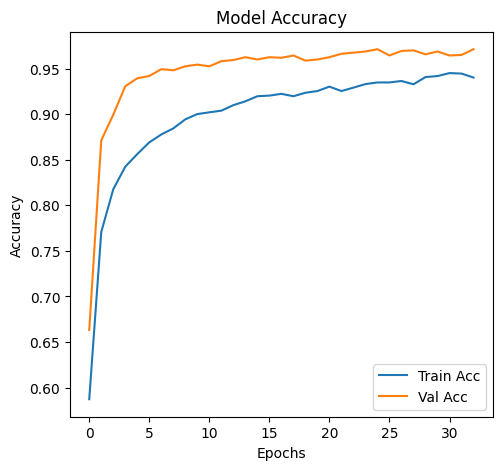

In [101]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


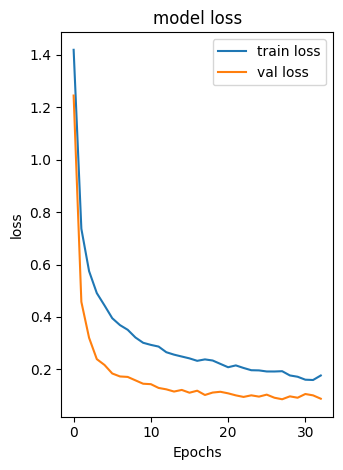

In [102]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('model loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.tight_layout()
plt.show()